In [80]:
!pip install vectorbt
!pip install python-binance

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import vectorbt as vbt
import time
from binance.client import Client
import yfinance as yf
import torch
import torch.nn as nn

| Interval       | Max Lookback Period (approx)  |
|----------------|-------------------------------|
| `'1m'`         | 7 days                        |
| `'2m'`         | 60 days                       |
| `'5m'`         | 60 days                       |
| `'15m'`        | 60 days                       |
| `'30m'`        | 60 days                       |
| `'60m'` / `'1h'` | 730 days (~2 years)        |
| `'1d'`         | ~20+ years                    |
| `'1wk'`        | ~20+ years                    |
| `'1mo'`        | ~20+ years                    |

In [82]:
#data_request = vbt.BinanceData.download("BTCUSDT", start="2025-04-14", end="2025-04-17", interval="1m")
data_request = vbt.YFData.download("BTC-USD", start="2025-04-14", end="2025-04-17", interval="1m")
data = data_request.get()
print(data.head())
print(data["Volume"].iloc[-1])
time.sleep(3)

data_request = data_request.update()
data = data_request.get()
print(data["Volume"].iloc[-1])


                                   Open          High           Low  \
Datetime                                                              
2025-04-14 00:01:00+00:00  83706.945312  83706.945312  83706.945312   
2025-04-14 00:03:00+00:00  83729.085938  83729.085938  83729.085938   
2025-04-14 00:04:00+00:00  83800.125000  83800.125000  83800.125000   
2025-04-14 00:06:00+00:00  83708.820312  83708.820312  83708.820312   
2025-04-14 00:07:00+00:00  83785.421875  83785.421875  83785.421875   

                                  Close     Volume  Dividends  Stock Splits  
Datetime                                                                     
2025-04-14 00:01:00+00:00  83706.945312          0        0.0           0.0  
2025-04-14 00:03:00+00:00  83729.085938  132960256        0.0           0.0  
2025-04-14 00:04:00+00:00  83800.125000  678313984        0.0           0.0  
2025-04-14 00:06:00+00:00  83708.820312   23078912        0.0           0.0  
2025-04-14 00:07:00+00:00  83785.4

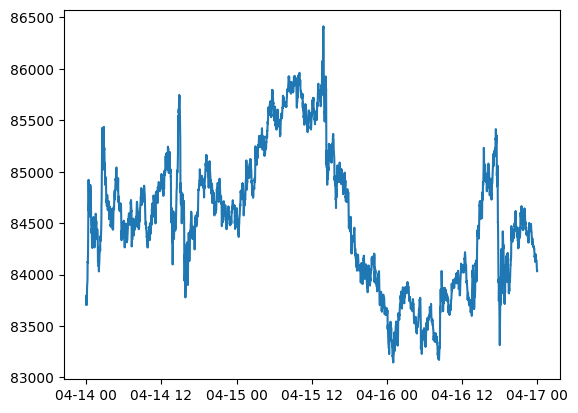

In [79]:
data.vbt.ohlcv.plot(plot_type="candlestick",show_volume=True)
plt.plot(data.index,data["Close"])

In [93]:
input = pd.DataFrame(index = data.index, data = {"Close":data["Close"]})
input=(input-input.min())/(input.max()-input.min())

size_test_prct = 0.3
train_size = int(len(input)*(1-size_test_prct))
train_input = input[:train_size]
test_input = input[train_size:]

train_input = np.array(train_input)
test_input = np.array(test_input)

train_input = torch.from_numpy(train_input).type(torch.Tensor)
test_input = torch.from_numpy(test_input).type(torch.Tensor)

print(train_input)
print(test_input)

tensor([[0.1718],
        [0.1786],
        [0.2004],
        ...,
        [0.1936],
        [0.1940],
        [0.1938]])
tensor([[0.1885],
        [0.1798],
        [0.1722],
        ...,
        [0.2743],
        [0.2711],
        [0.2723]])
